# FEATURE SELECTION

In this project, I have worked on open-source Pima Diabetes dataset to enhance my understanding of feature selection.

I have performed the following tasks:

[**Task 1**](#task1): Importing relevant libraries for different feature selection methods

[**Task 2**](#task2): Importing the data

[**Task 3**](#task3): Two univariate selection methods: Pearson correlation filtering and selectKBest f_classif

[**Task 4**](#task4): Two wrapper methods: Backward Sequential Feature Selection (BSFS) and Recursive Feature Elimination (RFE)

[**Task 5**](#task5): Two embedded methods: Feature importance Estimation using Bagged Decision Trees and Lasso regularization

[**Task 6**](#task6): Dimensionality Reduction using Principal Component Analysis



<a id='task1'></a>
# Task 1: Importing Libraries

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import set_printoptions
import seaborn as sns
from sklearn.model_selection import train_test_split

# For task 3
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from scipy.stats.stats import pearsonr
import os


# For task 4
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# For task 5
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# For task 6
from sklearn.decomposition import PCA



<a id='task2'></a>
# Task 2 : Load the data

In [2]:
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df = read_csv("datasets_228_482_diabetes.csv",names=names, skiprows=1)

In [3]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

<a id='task3'></a>
# Task 3: Two Univariate Selection Methods: SelectKBest and Pearson Correlation filtering

Splitting the data into dependent and independent variables

In [6]:
X = df.drop('class', axis=1).copy()
Y = df['class'].copy()

In [7]:
X

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## SelectKBest method with f_classif as the score function

Initialising the test

In [8]:
test = SelectKBest(score_func=f_classif, k = 4) #k implies the number of nearest neighbours that will be searching for each feature
#You can also use chi-squared test or any other test instead of f class test.

Initialising the fit

In [9]:
fit = test.fit(X,Y)

In [10]:
type(X)

pandas.core.frame.DataFrame

Transforming the features

In [11]:
features = fit.transform(X)
features[0:5,:]

array([[  6. , 148. ,  33.6,  50. ],
       [  1. ,  85. ,  26.6,  31. ],
       [  8. , 183. ,  23.3,  32. ],
       [  1. ,  89. ,  28.1,  21. ],
       [  0. , 137. ,  43.1,  33. ]])

## Pearson Correlation Filtering

In [12]:
cor = df.corr()
cor

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Plotting the heat map

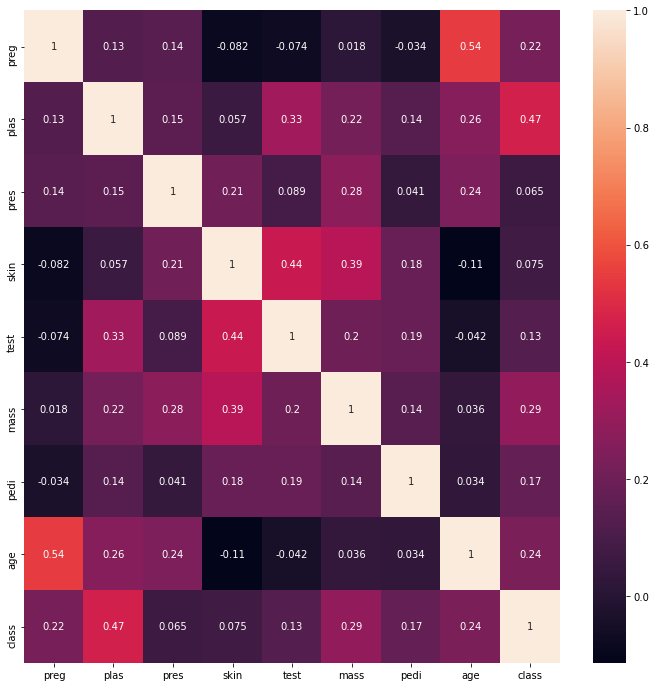

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True)
plt.show()

Correlation with dependent variable (Y)

In [14]:
cor_target = abs(cor['class'])
cor_target

preg     0.221898
plas     0.466581
pres     0.065068
skin     0.074752
test     0.130548
mass     0.292695
pedi     0.173844
age      0.238356
class    1.000000
Name: class, dtype: float64

Selecting highly correlated features

In [15]:
relevant_features= cor_target[cor_target>0.2]
relevant_features

preg     0.221898
plas     0.466581
mass     0.292695
age      0.238356
class    1.000000
Name: class, dtype: float64

Another way to find Pearson Correlation Coefficient

In [16]:
X.corrwith(Y)

preg    0.221898
plas    0.466581
pres    0.065068
skin    0.074752
test    0.130548
mass    0.292695
pedi    0.173844
age     0.238356
dtype: float64

We can find the relevant features in the similar fashion described above

We can also use Spearman's rank correlation and Kendall Tau correlation (which are coeefieincts that compare rankings of data instead of developing a linear correlation. This can be done as follows:

In [17]:
X.corrwith(Y, method = 'kendall')

preg    0.170370
plas    0.390565
pres    0.119206
skin    0.076297
test    0.058531
mass    0.253676
pedi    0.143359
age     0.257363
dtype: float64

In [18]:
X.corrwith(Y, method='spearman')

preg    0.198689
plas    0.475776
pres    0.142921
skin    0.089728
test    0.066472
mass    0.309707
pedi    0.175353
age     0.309040
dtype: float64

<a id='task4'></a>
# Task 4: Two wrapper methods: Backward Sequential Feature Selection (BSFS)  and Recursive Feature Elimination (RFE)

BSFS selects the best features among all the features sequentially using Pearson correlation whereas RFE eliminates worst feature in every iterative cycle. RFE performs full ranking of the features.

## RFE method

In [19]:
model = LogisticRegression(solver = 'lbfgs')

In [20]:
rfe = RFE(model,n_features_to_select = 4)

In [21]:
fit = rfe.fit(X,Y)

/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print("Num features: %d" % fit.n_features_)
print("Selected Features :%s" % fit.support_)
print("Feature Ranking %s" % fit.ranking_)

Num features: 4
Selected Features :[ True  True False False False  True  True False]
Feature Ranking [1 1 3 4 5 1 1 2]


## BSFS method

In [23]:
bsfs = sfs(model, k_features = 4, forward= False)

In [24]:
fit1 = bsfs.fit(X,Y)

/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [25]:
fit1.k_feature_idx_

(1, 2, 5, 6)

In [26]:
fit1.k_feature_names_

('plas', 'pres', 'mass', 'pedi')

In [27]:
fit1.k_score_

0.7721330956625074

<a id='task5'></a>
# Task 5: Two embedded methods: Feature importance Estimation using Bagged Decision Trees and Lasso Regularization

## Bagged Decision Trees

In [28]:
model = ExtraTreesClassifier(n_estimators = 10)

In [29]:
model.fit(X,Y)

ExtraTreesClassifier(n_estimators=10)

In [30]:
print(model.feature_importances_)

[0.10758747 0.23288322 0.10737189 0.08303889 0.07010692 0.13554495
 0.12891048 0.13455617]


## Lasso Regularization

In [31]:
lasso = Lasso()

In [32]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

In [33]:
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)

In [34]:
fit=lasso_regressor.fit(X,Y)

/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.441560812325484, tolerance: 0.013941368078175902
  model = cd_fast.enet_coordinate_descent(
/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0369896488384569, tolerance: 0.01384902280130293
  model = cd_fast.enet_coordinate_descent(
/Users/kan-che01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.347732830017094, tolerance: 0.014373008130081298
  model = cd_fast.enet_coordinate_descent(


In [35]:
print(fit.best_params_)
print(fit.best_score_)

{'alpha': 0.0001}
-0.1625266035931419


<a id='task6'></a>
# Task 6: Dimensionality Reduction using Principal Component Analysis



In [36]:
pca = PCA(n_components = 4)

In [37]:
fit = pca.fit(X)

In [38]:
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)
print()

Explained Variance: [0.88854663 0.06159078 0.02579012 0.01308614]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]
 [-4.90459604e-02  1.19830016e-01 -2.62742788e-01  8.84369380e-01
  -6.55503615e-02  1.92801728e-01  2.69908637e-03 -3.01024330e-01]]

